## Homework #5
1. Choose more than one clustering algorithm (you can use any algorithm you can find, but it should be appropriate for your data and initial assumptions)
2. Run them on your data and visualize (You can make classes from target value to check the quality of your results)
3. Try to find some interesting patterns in your data if possible 


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import cluster
import seaborn as sns
from sklearn.cluster import DBSCAN
import sklearn.cluster as cl
import matplotlib.pyplot as plt

### K-means кластеризация

In [5]:
df = pd.read_csv('PCA_data.csv', index_col=0)
features = df.drop(columns=['gap'])

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'KMeans Clustering'}, xlabel='0', ylabel='1'>

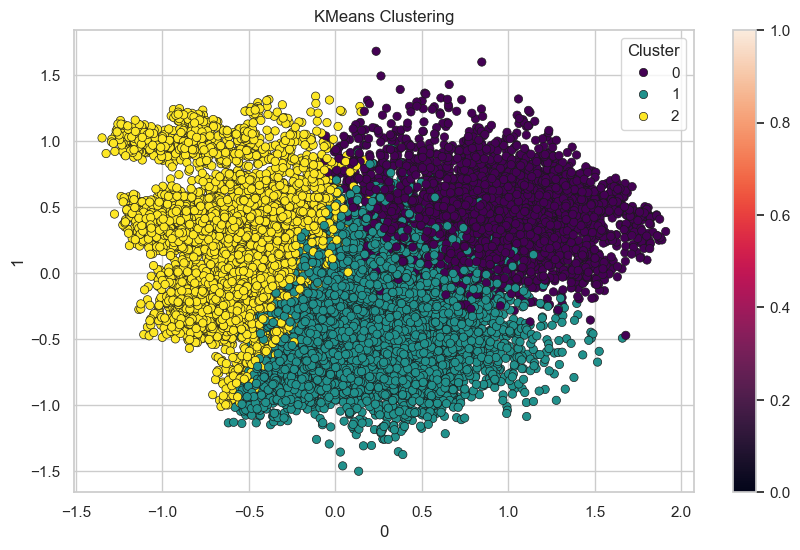

In [9]:
# Создаем объект для кластеризации 
kmeans = cluster.KMeans(n_clusters=3)

# Применяем модель KMeans
kmeans.fit(features)

# Получаем метки кластеров для каждой точки
labels = kmeans.labels_

sns.set(style="whitegrid")

k_features = features.copy()
k_features['Cluster'] = labels

plot_data = k_features.iloc[:, :2]
plot_data['Cluster'] = k_features['Cluster']

plot = sns.scatterplot(data=plot_data, x=plot_data.columns[0], y=plot_data.columns[1], hue="Cluster", palette='viridis', edgecolor='k', legend="full")

plot.set_title("KMeans Clustering")
plot.figure.set_size_inches(10, 6)
plot.figure.colorbar(plot.collections[0])

plot

### DBSCAN кластеризация

/var/folders/gb/8fm3j9613nb1ffbz2bbtnbxh0000gn/T/ipykernel_92173/3329268579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Cluster'] = features_n['Cluster']


<Axes: title={'center': 'DBSCAN Clustering'}, xlabel='0', ylabel='1'>

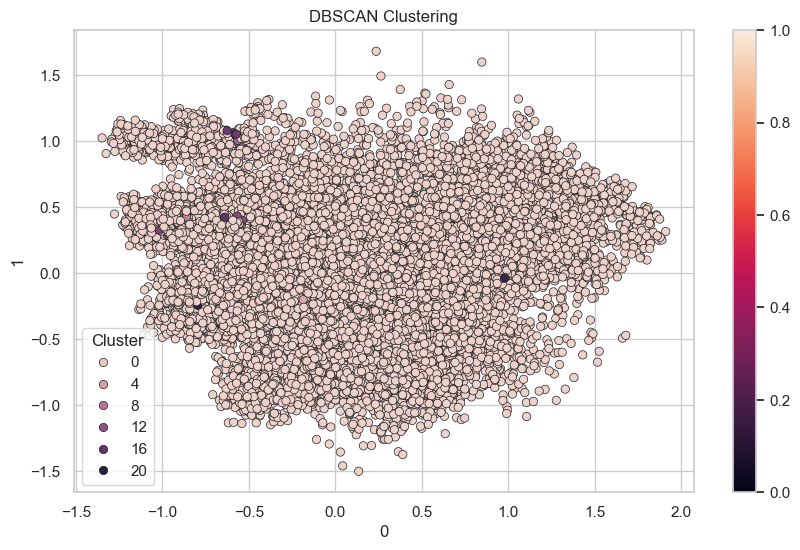

In [13]:
dbscan_instance = cl.DBSCAN()
dbscan_instance.fit(features)
labels = dbscan_instance.labels_

features_n = features.copy()
features_n['Cluster'] = labels

plot_data = features.iloc[:, :2]
plot_data['Cluster'] = features_n['Cluster']

plot = sns.scatterplot(data=plot_data, x=plot_data.columns[0], y=plot_data.columns[1], hue="Cluster", edgecolor='k')

plot.set_title("DBSCAN Clustering")
plot.figure.set_size_inches(10, 6)
plot.figure.colorbar(plot.collections[0])

plot

На моем наборе данных K-means кластеризация справилась с задачей разделения данных на классы лучше, чем DBSCAN кластеризация